## Logistic regression

### 0. Iris flower dataset

In [151]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

a)

In [152]:
iris = datasets.load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [153]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

b)

In [154]:
df = iris["frame"]
df["specie_name"] = df.target.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,specie_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


c)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   specie_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [156]:
df.describe().T.drop("target", axis=0)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

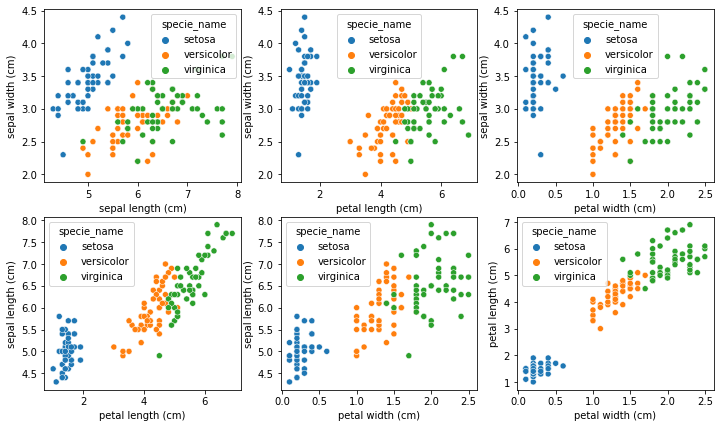

In [157]:
fig, axes = plt.subplots(2, 3, figsize=(12,7))
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="specie_name", ax = axes[0,0])
sns.scatterplot(data=df, x="petal length (cm)", y="sepal width (cm)", hue="specie_name", ax = axes[0,1])
sns.scatterplot(data=df, x="petal width (cm)", y="sepal width (cm)", hue="specie_name", ax = axes[0,2])

sns.scatterplot(data=df, x="petal length (cm)", y="sepal length (cm)", hue="specie_name", ax = axes[1,0])
sns.scatterplot(data=df, x="petal width (cm)", y="sepal length (cm)", hue="specie_name", ax = axes[1,1])

sns.scatterplot(data=df, x="petal width (cm)", y="petal length (cm)", hue="specie_name", ax = axes[1,2])

d)

<AxesSubplot:>

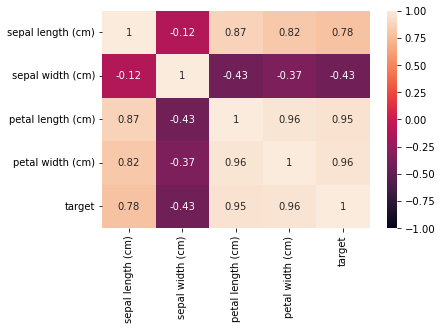

In [158]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

- 1 means that when one variable increase the other one does too 
- -1 means when one variable increase the other one decreases
- 0 means that there is no correlation

e)

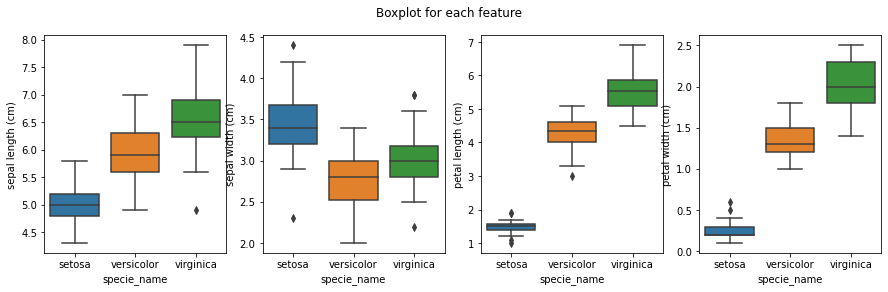

In [159]:
fig, axes = plt.subplots(1, 4, figsize=(15,4))

fig.suptitle("Boxplot for each feature")
for ax, col in zip(axes, ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]):
    sns.boxplot(data = df, x = "specie_name", y = col, ax = ax)


f)

In [206]:
outliers = pd.DataFrame()
for spicie in df["specie_name"].unique():
    outliers[f"lower {spicie}"] = df[df["specie_name"] == spicie].quantile(0.25) - 1.5 * (df[df["specie_name"] == spicie].quantile(0.75) - df[df["specie_name"] == spicie].quantile(0.25))
    outliers[f"higher {spicie}"] = df[df["specie_name"] == spicie].quantile(0.75) + 1.5 * (df[df["specie_name"] == spicie].quantile(0.75) - df[df["specie_name"] == spicie].quantile(0.25))

outliers = outliers.drop("target")
outliers

,lower setosa,higher setosa,lower versicolor,higher versicolor,lower virginica,higher virginica
petal length (cm),1.1375,1.8375,3.1000,5.5000,3.9375,7.0375
petal width (cm),0.0500,0.4500,0.7500,1.9500,1.0500,3.0500
sepal length (cm),4.2000,5.8000,4.5500,7.3500,5.2125,7.9125
sepal width (cm),2.4875,4.3875,1.8125,3.7125,2.2375,3.7375
